### Preamble

In [1]:
import $ivy.`org.scalatest::scalatest:3.2.16`
import org.scalatest.{Filter => _, _}, flatspec._, matchers._

import $ivy.$                                

import org.scalatest.{Filter => _, _}, flatspec._, matchers._


# Topic 7. Applications

## 7.1 Scala Collections

### References

A gentle guide to the Scala's collection library can be found online in the Scala site:

https://docs.scala-lang.org/scala3/book/collections-intro.html

[__Programming in Scala, 
A comprehensive step-by-step guide__](https://www.artima.com/shop/programming_in_scala_3ed) Third Edition.
by Martin Odersky, Lex Spoon, and Bill Venners. 

- Chapter 11. Scala's Hierarchy 
- Chapter 17. Working with Other Collections
- Chapter 24. Collections in Depth
- Chapter 25. The Architecture of Scala Collections

[__Functional programming in Scala__](https://www.manning.com/books/functional-programming-in-scala), by Paul Chiusano and Runar Bjarnason.

- Chapter 3. Functional data structures

[__Functional programming simplified__](https://alvinalexander.com/downloads/fpsimplified-free-preview.pdf), by Alvin Alexander.

- Chapters 29-36. Recursion.

### Collection types

Collection types can be classified along two major dimensions:
- Mutable/Immutable: mutable collections can be modified in-place; immutable collections return a new instance when they are updated.
- Sequences/Sets/Maps. These are ordered/unordered collections and key-value collections, respectively. 

There are many different implementations of sequences, sets and maps, as summarized by these figures (cf. Scala's [guide](https://docs.scala-lang.org/scala3/book/collections-classes.html))

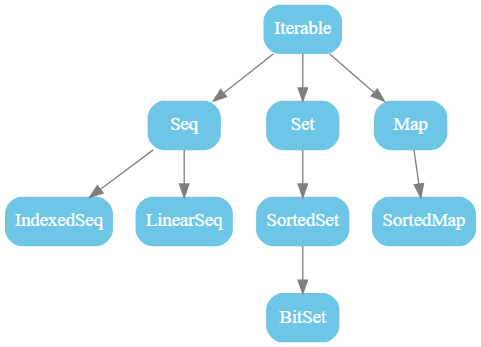

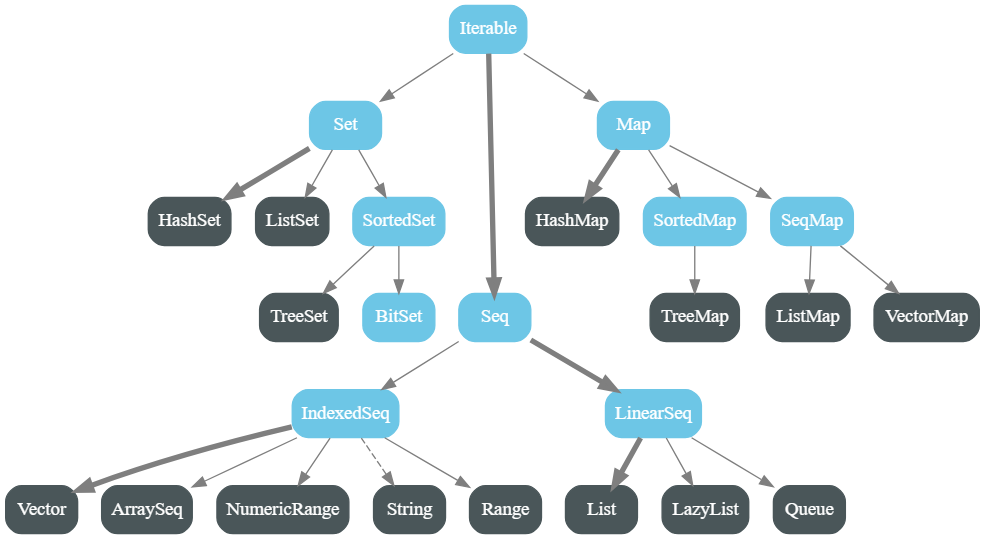

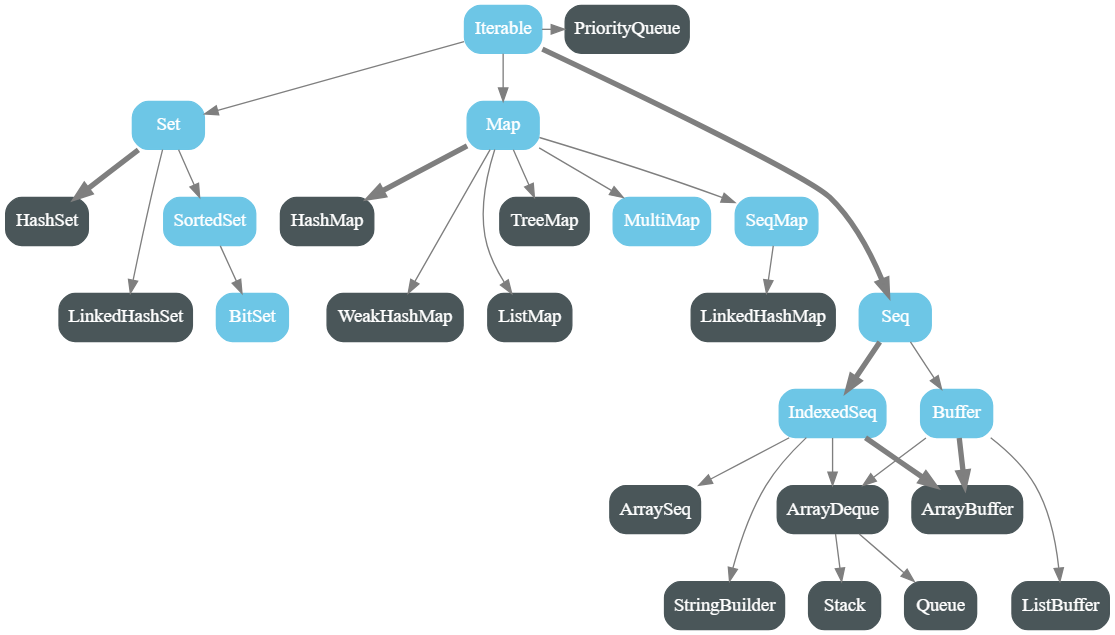

How do we choose from this huge number of collection types and implementations? The colletion type is chosen according to the functionality that we demand from our collection, e.g., should it be _ordered_?, can there be repeated elements?, are elements associated with keys?, etc. In order to choose the right implementation of the collection type (e.g. should I use a `Vector` or a `List`?) we must take into account the complexity of the corresponding implementation: 

https://docs.scala-lang.org/overviews/collections-2.13/performance-characteristics.html

From now on, we will work with immutable collection types only.

# Maps

`Map`s are key-value collections (i.e. they are like sets of key-value pairs indexed by their keys). Check out the [Scala 3 API](https://www.scala-lang.org/api/current/scala/collection/immutable/Map.html).

In [2]:
val m: Map[String, Int] = 
    Map(("a", 5), ("b", 10), ("c", 11))

m: Map[String, Int] = Map("a" -> 5, "b" -> 10, "c" -> 11)

Specially for key-value pairs, we commonly write `Tuple2` values with the following syntax: 

In [1]:
val m: Map[String, Int] = 
    Map("a" -> 5, "b" -> 10, "c" -> 11)

m: Map[String, Int] = Map("a" -> 5, "b" -> 10, "c" -> 11)

Common operations on maps: 

In [4]:
// retrieving values of existing and non-existing keys

m("a"): Int
m.get("a"): Option[Int]
try m("d") catch case _ => "exception raised" 
m.get("d") 

res4_0: Int = 5
res4_1: Option[Int] = Some(value = 5)
res4_2: scala.Int | java.lang.String = "exception raised"
res4_3: Option[Int] = None

In [5]:
// retrieving all keys and values

m.keys: Iterable[String]
m.values: Iterable[Int]

res4_0: Iterable[String] = Set("a", "b", "c")
res4_1: Iterable[Int] = Iterable(5, 10, 11)

The default implementation types of these `Iterable`s are `collection.immutable.Set` and the general `View` type. Views are _lazy_ collections which offer better performance. For more information on views consult the Scala [guide](https://docs.scala-lang.org/overviews/collections-2.13/views.html). The only thing that we need from views and the general `Iterable` collection type is that they can be converted to a concrete collection type with conversors `toList`, `toSet`, `toMap`, etc. 

In [6]:
// Converting to proper implementation types
m.keys.toList
m.keys.toSet
m.values.toList
m.values.toSet

res5_0: List[String] = List("a", "b", "c")
res5_1: Set[String] = Set("a", "b", "c")
res5_2: List[Int] = List(5, 10, 11)
res5_3: Set[Int] = Set(5, 10, 11)

We can also convert optional values to collection types: 

In [7]:
Some(1).toSet
Some(0).toList
None.toSet
None.toList

res6_0: Set[Int] = Set(1)
res6_1: List[Int] = List(0)
res6_2: Set[Nothing] = Set()
res6_3: List[Nothing] = List()

Map and filter are also available for maps:

In [8]:
// Mapping values (toMap is required to convert the view type `MapView` to `Map`)

val m2: Map[String, Boolean] = 
    m.mapValues((value: Int) => value % 2 == 0).toMap

m2: Map[String, Boolean] = Map("a" -> false, "b" -> true, "c" -> false)

In [9]:
// Mapping whole entries, not only values

m.map((entry: (String, Int)) => entry._2 % 2 == 0)
m.map{ case (key: String, value: Int) => value % 2 == 0 }

res8_0: collection.immutable.Iterable[Boolean] = List(false, true, false)
res8_1: collection.immutable.Iterable[Boolean] = List(false, true, false)

In [5]:
// Filter also return a general iterable (a list, by default)
m.filter:
    case (key: String, value: Int) => value > 10 

res5: Map[String, Int] = Map("c" -> 11)

We can obtain a `Map` from a list of pairs with `toMap`:

In [6]:
val l: List[(Int, String)] =  
    List((1, "a"), (2, "b"), (1, "c"), (2, "d"), (3, "a"))

l.toMap

l: List[(Int, String)] = List((1, "a"), (2, "b"), (1, "c"), (2, "d"), (3, "a"))
res6_1: Map[Int, String] = Map(1 -> "c", 2 -> "d", 3 -> "a")

Note that only one value is kept for a single key. If we want all values, we can use `groupBy`:

In [7]:
l.groupBy:
    entry => entry._1

res7: Map[Int, List[(Int, String)]] = HashMap(
  1 -> List((1, "a"), (1, "c")),
  2 -> List((2, "b"), (2, "d")),
  3 -> List((3, "a"))
)

# Sets

`Set`s are unordered collections of unique elements. Check out the [Scala 3 API](https://www.scala-lang.org/api/current/scala/collection/immutable/Set.html). The following two sets are equal: 

In [ ]:
Set(1,2,2,3) == Set(3,1,2)
// compare with lists:
List(1,2,2,3) == List(3,1,2)

Common operations on sets: filter, flatMap, map.

In [ ]:
// Filtering elements
Set(-1, 0, 1, 3, -5, 2, 4).filter(e => e > 0)

In [ ]:
// Mapping elements
Set(-1,-4,-3,5).map(e => e.abs)

In [ ]:
// Flatmapping elements
Set(1,2,3).flatMap(e => Set(e,-e))

Specific operations: subsetOf, diff, union, etc.

In [8]:
// Common set operations
Set(1,2,3).subsetOf(Set(1,2,3,4))
Set(1,2,3) subsetOf Set(1,2)
Set(1,2,3) diff Set(1,2)
Set(1) diff Set(3,4)
Set(1,2,3) union Set(1,2,3,4,5)

res8_0: Boolean = true
res8_1: Boolean = false
res8_2: Set[Int] = Set(3)
res8_3: Set[Int] = Set(1)
res8_4: Set[Int] = HashSet(5, 1, 2, 3, 4)